<a href="https://colab.research.google.com/github/codeantik/Google-Stock-Price-Detection/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing

#### importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

#### feature scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#### creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [7]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


#### reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


### Building the RNN

#### importing keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### initializing the rnn

In [11]:
regressor = Sequential()

#### adding the first LSTM layer and some Dropout regularization

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

#### adding a second LSTM layer and some Dropout regularization

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#### adding a third LSTM layer and some Dropout regularization

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#### adding a fourth LSTM layer and some Dropout regularization

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.2))

#### adding the output layer

In [16]:
regressor.add(Dense(units = 1))

#### compiling the rnn

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### fitting the RNN to the Training Set

In [18]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 9s 84ms/step - loss: 0.0384
Epoch 2/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0046
Epoch 13/100
38/38 [=====

### Making the Predictions and Visualising the Results

#### getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


#### visualizing the results

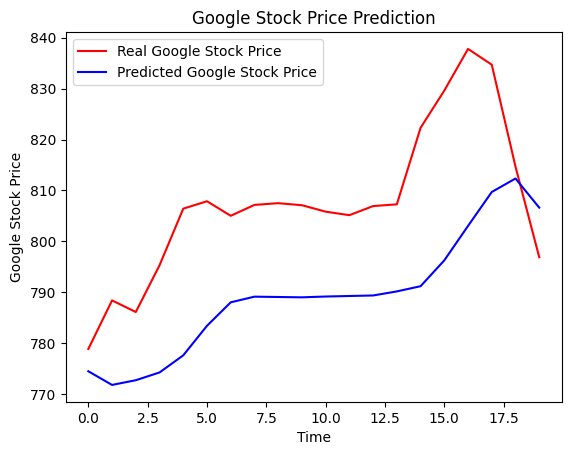

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Evaluate the model

In [23]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)
print(rmse / 80)

20.96447886174054
0.26205598577175676
